# Выбор локации для скважины

## Описание исследования

В исследовании проводится анализ проб нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов.

На основании этого анализа строится модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль, а также с помощью техники `Bootstrap` оценивается возможная прибыль и риски убытков в каждом из регионов.

Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины. Для разработки выбирают месторождения с самым высокими оценками значений запасов. Прибыль равна суммарной прибыли отобранных месторождений в регионе.

## Цель исследования

- Построить модель машинного обучения для предсказания объёма запасов нефти в каждом из регионов.
- Оценить среднюю ожидаемую прибыль и риск убытков в каждом из регионов с целью определения подходящего региона для разработки новых скважин.

## Задачи исследования

- Загрузка и знакомство с датасетами, содержащими информацию о пробах нефти в трёх регионах.
- Предобработка данных, включая изменение форматирования числовых данных для экономии памяти компьютера.
- Статистический анализ признаков, в том числе анализ коэффициентов вариации.
- Исследовательский анализ с целью установления выбросов, мультимодальности и иных особенностей в данных.
- Корреляционный анализ признаков средствами библиотеки `phik`, а также визуальный анализ диаграмм зависимости объёма запасов от числовых входных признаков.
- Обучение моделей линейной регрессии и подбор гиперпараметров, проверка моделей на валидационных выборках по каждому региону с получением метрики RMSE и оценка среднего значения запасов в скважине в каждом из регионов.
- Подготовка функций для расчёта прибыли от добычи сырья в регионе.
- Оценка инвестиционной привлекательности каждого из регионов путём расчета следующих показателей с помощью техники `Bootstrap` на основе предсказанных значений запасов в скважинах:
  - средняя прибыль при разработке новых скважин в регионе;
  - 95%-й доверительный интервал для прибыли в регионе;
  - риск убытка в регионе.

## Исходные данные

Данные геологоразведки трёх регионов находятся в трёх файлах и содержат следующие признаки:
- `id` — уникальный идентификатор скважины;
- `f0`, `f1`, `f2` — три признака точек;
- `product` — объём запасов в скважине (тыс. баррелей), целевой признак.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-исследования" data-toc-modified-id="Описание-исследования-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание исследования</a></span></li><li><span><a href="#Цель-исследования" data-toc-modified-id="Цель-исследования-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Цель исследования</a></span></li><li><span><a href="#Задачи-исследования" data-toc-modified-id="Задачи-исследования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задачи исследования</a></span></li><li><span><a href="#Исходные-данные" data-toc-modified-id="Исходные-данные-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исходные данные</a></span></li><li><span><a href="#Содержание" data-toc-modified-id="Содержание-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Содержание</a></span></li><li><span><a href="#Импорт-библиотек-и-загрузка-данных" data-toc-modified-id="Импорт-библиотек-и-загрузка-данных-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Импорт библиотек и загрузка данных</a></span></li><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Знакомство с данными</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-результатам-знакомства-с-данными" data-toc-modified-id="Вывод-по-результатам-знакомства-с-данными-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Вывод по результатам знакомства с данными</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-результатам-предобработки-данных" data-toc-modified-id="Вывод-по-результатам-предобработки-данных-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Вывод по результатам предобработки данных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Статистический-анализ-признаков" data-toc-modified-id="Статистический-анализ-признаков-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Статистический анализ признаков</a></span></li><li><span><a href="#Гистограммы-распределения-значений-числовых-признаков" data-toc-modified-id="Гистограммы-распределения-значений-числовых-признаков-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Гистограммы распределения значений числовых признаков</a></span></li><li><span><a href="#&quot;Ящики-с-усами&quot;-для-значений-числовых-признаков" data-toc-modified-id="&quot;Ящики-с-усами&quot;-для-значений-числовых-признаков-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>"Ящики с усами" для значений числовых признаков</a></span></li><li><span><a href="#Вывод-по-результатам-исследовательского-анализа-данных" data-toc-modified-id="Вывод-по-результатам-исследовательского-анализа-данных-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Вывод по результатам исследовательского анализа данных</a></span></li></ul></li><li><span><a href="#Корреляционный-анализ-данных" data-toc-modified-id="Корреляционный-анализ-данных-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Корреляционный анализ данных</a></span><ul class="toc-item"><li><span><a href="#Матрица-корреляции-признаков" data-toc-modified-id="Матрица-корреляции-признаков-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Матрица корреляции признаков</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-результатам-анализа-матриц-корреляций-признаков" data-toc-modified-id="Вывод-по-результатам-анализа-матриц-корреляций-признаков-10.1.1"><span class="toc-item-num">10.1.1&nbsp;&nbsp;</span>Вывод по результатам анализа матриц корреляций признаков</a></span></li></ul></li><li><span><a href="#Диаграммы-зависимости-целевого-признака-от-входных-признаков" data-toc-modified-id="Диаграммы-зависимости-целевого-признака-от-входных-признаков-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Диаграммы зависимости целевого признака от входных признаков</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели-для-предсказания-объёма-запасов-сырья-в-скважинах" data-toc-modified-id="Обучение-и-проверка-модели-для-предсказания-объёма-запасов-сырья-в-скважинах-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Обучение и проверка модели для предсказания объёма запасов сырья в скважинах</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Обучение-модели-для-региона-0" data-toc-modified-id="Обучение-модели-для-региона-0-11.0.1"><span class="toc-item-num">11.0.1&nbsp;&nbsp;</span>Обучение модели для региона 0</a></span></li><li><span><a href="#Обучение-модели-для-региона-1" data-toc-modified-id="Обучение-модели-для-региона-1-11.0.2"><span class="toc-item-num">11.0.2&nbsp;&nbsp;</span>Обучение модели для региона 1</a></span></li><li><span><a href="#Обучение-модели-для-региона-2" data-toc-modified-id="Обучение-модели-для-региона-2-11.0.3"><span class="toc-item-num">11.0.3&nbsp;&nbsp;</span>Обучение модели для региона 2</a></span></li></ul></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли-от-добычи-сырья-в-регионах" data-toc-modified-id="Подготовка-к-расчёту-прибыли-от-добычи-сырья-в-регионах-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Подготовка к расчёту прибыли от добычи сырья в регионах</a></span></li><li><span><a href="#Расчёт-прибыли-от-добычи-сырья-в-регионах-и-оценка-рисков" data-toc-modified-id="Расчёт-прибыли-от-добычи-сырья-в-регионах-и-оценка-рисков-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Расчёт прибыли от добычи сырья в регионах и оценка рисков</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Импорт библиотек и загрузка данных

In [1]:
# устанавливаем библиотеку phik
!pip install phik -q

In [2]:
# обновляем библиотеку sklearn
!pip install --upgrade scikit-learn -q

In [3]:
# обновляем библиотеку matplotlib
!pip install --upgrade matplotlib -q

In [4]:
# обновляем библиотеку seaborn
!pip install --upgrade seaborn -q

In [5]:
# делаем необходимые импорты
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import phik

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

from sklearn.pipeline import Pipeline

# объявляем константы
RANDOM_STATE = 2024
TEST_SIZE = 0.25

In [6]:
# загружаем датасеты
try:
    df_geo_data_0 = pd.read_csv('geo_data_0.csv')
    df_geo_data_1 = pd.read_csv('geo_data_1.csv')
    df_geo_data_2 = pd.read_csv('geo_data_2.csv')
except:
    df_geo_data_0 = pd.read_csv(
        'https://code.s3.yandex.net/datasets/geo_data_0.csv'
    )
    df_geo_data_1 = pd.read_csv(
        'https://code.s3.yandex.net/datasets/geo_data_1.csv'
    )
    df_geo_data_2 = pd.read_csv(
        'https://code.s3.yandex.net/datasets/geo_data_2.csv'
    )

## Знакомство с данными

In [7]:
# создаем функцию для общей проверки данных в датафреймах
def get_initial_info(dataframe, dataframe_name, n_rows=5):
    print(f'Первые {n_rows} строк датафрейма {dataframe_name}:\n')
    display(dataframe.head(n_rows))
    print(f"\n{'-' * 80}")
    print(f'Общая информация о датафрейме {dataframe_name}:\n')
    dataframe.info()
    print(f"\n{'-' * 80}")
    print(f'Количество уникальных значений в колонках датафрейма \
{dataframe_name} (шт.):\n')
    display(dataframe.nunique())
    print(f"\n{'-' * 80}")
    print(f'Количество пропусков в колонках датафрейма \
{dataframe_name} (шт.):\n')
    display(dataframe.isna().sum())
    print(f"\n{'-' * 80}")
    print(f'Количество пропусков в колонках датафрейма \
{dataframe_name} (проценты):\n')
    display(dataframe.isna().sum()/len(dataframe) * 100)
    print(f"\n{'-' * 80}")
    print(f'Количество полных (явных) дубликатов в датафрейме \
{dataframe_name}:\n')
    display(dataframe.duplicated().sum())
    print(f"\n{'-' * 80}")
    print(f'Колонки датафрейма {dataframe_name}:\n')
    display(dataframe.columns)

In [8]:
# знакомимся с датафреймом df_geo_data_0
get_initial_info(df_geo_data_0, 'df_geo_data_0')

Первые 5 строк датафрейма df_geo_data_0:



,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



--------------------------------------------------------------------------------
Общая информация о датафрейме df_geo_data_0:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

--------------------------------------------------------------------------------
Количество уникальных значений в колонках датафрейма df_geo_data_0 (шт.):



id          99990
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_geo_data_0 (шт.):



id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_geo_data_0 (проценты):



id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64


--------------------------------------------------------------------------------
Количество полных (явных) дубликатов в датафрейме df_geo_data_0:



0


--------------------------------------------------------------------------------
Колонки датафрейма df_geo_data_0:



Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

In [9]:
# знакомимся с датафреймом df_geo_data_1
get_initial_info(df_geo_data_1, 'df_geo_data_1')

Первые 5 строк датафрейма df_geo_data_1:



,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



--------------------------------------------------------------------------------
Общая информация о датафрейме df_geo_data_1:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

--------------------------------------------------------------------------------
Количество уникальных значений в колонках датафрейма df_geo_data_1 (шт.):



id          99996
f0         100000
f1         100000
f2         100000
product        12
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_geo_data_1 (шт.):



id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_geo_data_1 (проценты):



id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64


--------------------------------------------------------------------------------
Количество полных (явных) дубликатов в датафрейме df_geo_data_1:



0


--------------------------------------------------------------------------------
Колонки датафрейма df_geo_data_1:



Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

In [10]:
# знакомимся с датафреймом df_geo_data_2
get_initial_info(df_geo_data_2, 'df_geo_data_2')

Первые 5 строк датафрейма df_geo_data_2:



,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



--------------------------------------------------------------------------------
Общая информация о датафрейме df_geo_data_2:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

--------------------------------------------------------------------------------
Количество уникальных значений в колонках датафрейма df_geo_data_2 (шт.):



id          99996
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_geo_data_2 (шт.):



id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_geo_data_2 (проценты):



id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64


--------------------------------------------------------------------------------
Количество полных (явных) дубликатов в датафрейме df_geo_data_2:



0


--------------------------------------------------------------------------------
Колонки датафрейма df_geo_data_2:



Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

In [11]:
# создаём словарь для колонок df_geo_data_0 для построения диаграмм
dict_df_geo_data_0 = dict(
    f0=['Значение признака месторождения f0',
        '''Распределение значений признака месторождения f0
датафрейма "df_geo_data_0"'''],
    f1=['Значение признака месторождения f1',
        '''Распределение значений признака месторождения f1
датафрейма "df_geo_data_0"'''],
    f2=['Значение признака месторождения f2',
        '''Распределение значений признака месторождения f2
датафрейма "df_geo_data_0"'''],
    product=['Объём запасов в скважине (тыс. баррелей)',
             '''Распределение объёмов запасов в скважинах
датафрейма "df_geo_data_0"''']
)

In [12]:
# создаём словарь для колонок df_geo_data_1 для построения диаграмм
dict_df_geo_data_1 = dict(
    f0=['Значение признака месторождения f0',
        '''Распределение значений признака месторождения f0
датафрейма "df_geo_data_1"'''],
    f1=['Значение признака месторождения f1',
        '''Распределение значений признака месторождения f1
датафрейма "df_geo_data_1"'''],
    f2=['Значение признака месторождения f2',
        '''Распределение значений признака месторождения f2
датафрейма "df_geo_data_1"'''],
    product=['Объём запасов в скважине (тыс. баррелей)',
             '''Распределение объёмов запасов в скважинах
датафрейма "df_geo_data_1"''']
)

In [13]:
# создаём словарь для колонок df_geo_data_2 для построения диаграмм
dict_df_geo_data_2 = dict(
    f0=['Значение признака месторождения f0',
        '''Распределение значений признака месторождения f0
датафрейма "df_geo_data_2"'''],
    f1=['Значение признака месторождения f1',
        '''Распределение значений признака месторождения f1
датафрейма "df_geo_data_2"'''],
    f2=['Значение признака месторождения f2',
        '''Распределение значений признака месторождения f2
датафрейма "df_geo_data_2"'''],
    product=['Объём запасов в скважине (тыс. баррелей)',
             '''Распределение объёмов запасов в скважинах
датафрейма "df_geo_data_2"''']
)

In [14]:
# создаём функцию для построения гистограмм по числовым столбцам
def plot_hist(dataframe,
              bins='auto',
              kde=False,
              hue=None,
              legend=False,
              legend_title=None,
              figsize=None,
              hue_order=None,
              ylabel='Частота встречаемости (шт.)',
              bbox_to_anchor=(1.0, 1.0),
              loc='upper left',
              alpha=0.8,
              element='bars',
              fill=True,
              stat='count',
              common_norm=True,
              **columns):
    # ключи словаря columns - названия колонок датафрейма
    # значения словаря columns - список [xlabel, title]
    num_cols = dataframe.dtypes.loc[lambda x: (
        (x == 'int64') | (x == 'int32') | (x == 'int16') |
        (x == 'float64') | (x == 'float32') | (x == 'float16')
    )]
    df = dataframe.copy()
    if legend:
        df.rename(columns={hue: legend_title}, inplace=True)
    for column, labels in columns.items():
        if column in num_cols:
            fig, ax = plt.subplots(figsize=figsize)
            sns.histplot(df,
                         bins=bins,
                         x=column,
                         legend=legend,
                         kde=kde,
                         hue=legend_title,
                         hue_order=hue_order,
                         alpha=alpha,
                         element=element,
                         fill=fill,
                         stat=stat,
                         common_norm=common_norm)
            plt.ylabel(ylabel)
            plt.xlabel(labels[0])
            plt.title(labels[1])
            if legend:
                sns.move_legend(ax, loc=loc, bbox_to_anchor=(bbox_to_anchor))
            plt.show()

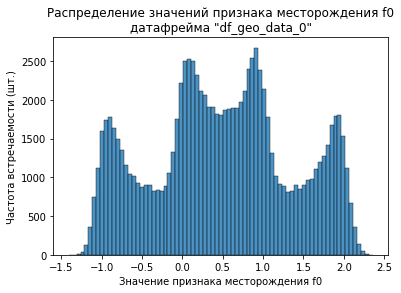

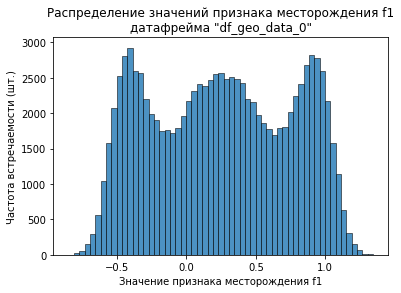

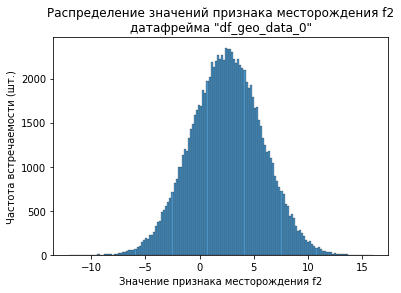

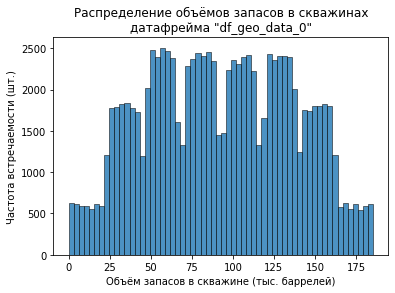

In [15]:
# строим гистограммы для числовых столбцов датафрейма df_geo_data_0
plot_hist(
    df_geo_data_0,
    **dict_df_geo_data_0
)

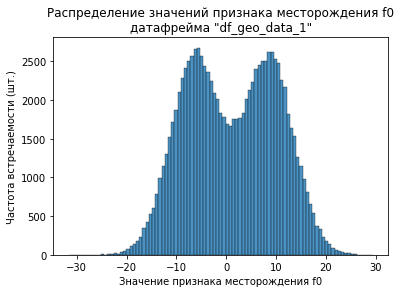

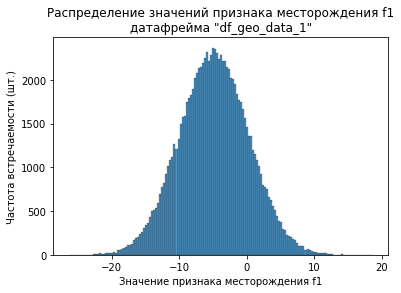

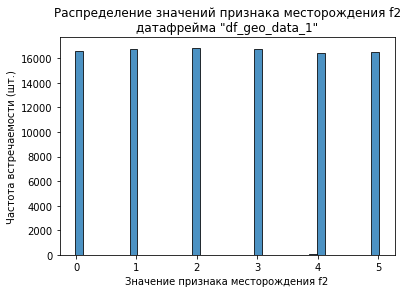

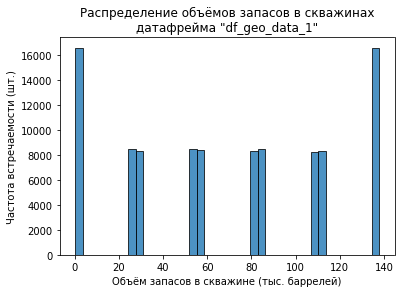

In [16]:
# строим гистограммы для числовых столбцов датафрейма df_geo_data_1
plot_hist(
    df_geo_data_1,
    **dict_df_geo_data_1
)

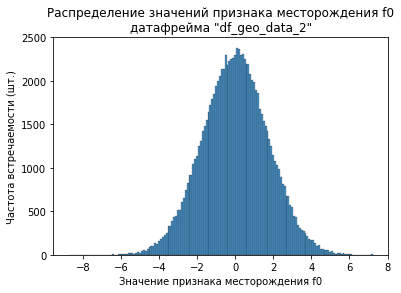

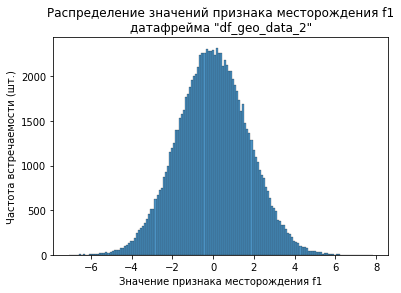

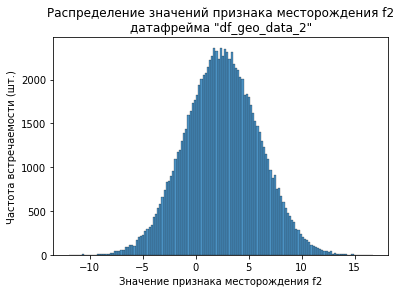

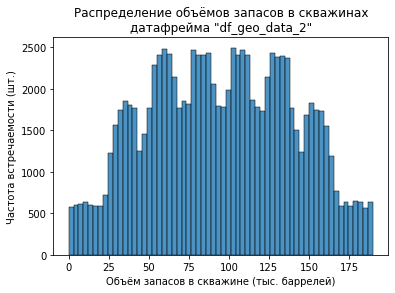

In [17]:
# строим гистограммы для числовых столбцов датафрейма df_geo_data_2
plot_hist(
    df_geo_data_2,
    **dict_df_geo_data_2
)

### Вывод по результатам знакомства с данными

По результатам первичного знакоммства с данными мы можем сделать следующие выводы:
- данные в датасетах соответствуют их описанию;
- форматы назнваний колонок соответствуют формату `snake_case`;
- пропущенных значений в датасетах нет;
- числовые данные в колонках `f0`, `f1`, `f2` и `product` уместно перевести в из формата float64 в формат float32 для экономии памяти компьютера - это нужно сделать на этапе предобработки данных;
- во всех трёх датасетах присутствуют единичные дубликаты в колонке `id`, от которых следует избавиться на этапе предобработки данных;
- в колонке `product` датафрейма `df_geo_data_1` содержится всего 12 уникальных значений из 100 тысяч наблюдений, что может объясняется дискретностью распределения значений входного признака `f2` либо интервальной методикой оценки значений признака `product`;
- аномальных значений в данных не обнаружено, однако можно заметить выбросы в ряде признаков - это необходимо более подробно исследовать на этапе исследовательского анализа данных.

## Предобработка данных

In [18]:
# создаём словарь для изменения типов данных в колонках датафреймов
convert_dict = {
    'f0': 'float32',
    'f1': 'float32',
    'f2': 'float32',
    'product': 'float32'
}

In [19]:
# меняем форматы числовых данных в датафреймах на float32
df_geo_data_0 = df_geo_data_0.astype(convert_dict)
df_geo_data_1 = df_geo_data_1.astype(convert_dict)
df_geo_data_2 = df_geo_data_2.astype(convert_dict)

In [20]:
# удаляем дубликаты по колонке id из датафреймов
df_geo_data_0.drop_duplicates('id', inplace=True)
df_geo_data_1.drop_duplicates('id', inplace=True)
df_geo_data_2.drop_duplicates('id', inplace=True)

In [21]:
# делаем сброс индексов датафреймов
df_geo_data_0.reset_index(drop=True, inplace=True)
df_geo_data_1.reset_index(drop=True, inplace=True)
df_geo_data_2.reset_index(drop=True, inplace=True)

In [22]:
# проверяем уникальные значения в колонке id датафрейма df_geo_data_0
df_geo_data_0.duplicated('id').sum()

0

In [23]:
# проверяем уникальные значения в колонке id датафрейма df_geo_data_1
df_geo_data_1.duplicated('id').sum()

0

In [24]:
# проверяем уникальные значения в колонке id датафрейма df_geo_data_2
df_geo_data_2.duplicated('id').sum()

0

In [25]:
# проверяем типы данных, размер и размерность датафрейа df_geo_data_0
df_geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99990 entries, 0 to 99989
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99990 non-null  object 
 1   f0       99990 non-null  float32
 2   f1       99990 non-null  float32
 3   f2       99990 non-null  float32
 4   product  99990 non-null  float32
dtypes: float32(4), object(1)
memory usage: 2.3+ MB


In [26]:
# проверяем типы данных, размер и размерность датафрейа df_geo_data_1
df_geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99996 entries, 0 to 99995
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float32
 2   f1       99996 non-null  float32
 3   f2       99996 non-null  float32
 4   product  99996 non-null  float32
dtypes: float32(4), object(1)
memory usage: 2.3+ MB


In [27]:
# проверяем типы данных, размер и размерность датафрейа df_geo_data_2
df_geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99996 entries, 0 to 99995
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float32
 2   f1       99996 non-null  float32
 3   f2       99996 non-null  float32
 4   product  99996 non-null  float32
dtypes: float32(4), object(1)
memory usage: 2.3+ MB


### Вывод по результатам предобработки данных

Мы суммарно сократили объём занимаемой датафреймами памяти на 39%, изменив тип числовых данных в колонках `f0`, `f1`, `f2` и `product` с `float64` на `float32`.

Мы также избавились от немногочисленных дубликатов в колонке `id` всех датафреймов, что не повлияет на результаты дальнейшего анализа и обучения моделей, так как размеры выборок сократились не более чем на 0.01%.

## Исследовательский анализ данных

### Статистический анализ признаков

In [28]:
# объявляем функцию для вывода описательных статистик
def get_stat_data(dataframe):
    df_stat = dataframe.describe().T
    df_stat['var%'] = df_stat['std'] / df_stat['mean'] * 100
    return df_stat

In [29]:
# выводим статистическую информацию по df_geo_data_0
get_stat_data(df_geo_data_0)

,count,mean,std,min,25%,50%,75%,max,var%
f0,99990.0,0.500454,0.871844,-1.408605,-0.072572,0.502405,1.073626,2.362331,174.210536
f1,99990.0,0.250141,0.504430,-0.848219,-0.200877,0.250252,0.700640,1.343769,201.658437
f2,99990.0,2.502629,3.248149,-12.088328,0.287784,2.515969,4.715035,16.003790,129.789480
product,99990.0,92.499680,44.288303,0.000000,56.497068,91.847927,128.563694,185.364349,47.879413


In [30]:
# выводим статистическую информацию по df_geo_data_1
get_stat_data(df_geo_data_1)

,count,mean,std,min,25%,50%,75%,max,var%
f0,99996.0,1.141209,8.965815,-31.609575,-6.298551,1.153055,8.620963,29.421755,785.642012
f1,99996.0,-4.796608,5.119905,-26.358599,-8.267985,-4.813172,-1.332816,18.734062,-106.740128
f2,99996.0,2.494501,1.703579,-0.018144,1.000021,2.011475,3.999904,5.019721,68.293383
product,99996.0,68.823921,45.944664,0.000000,26.953260,57.085625,107.813042,137.945404,66.756824


In [31]:
# выводим статистическую информацию по df_geo_data_2
get_stat_data(df_geo_data_2)

,count,mean,std,min,25%,50%,75%,max,var%
f0,99996.0,0.002002,1.732052,-8.760004,-1.162328,0.009424,1.158477,7.238263,86512.131715
f1,99996.0,-0.002159,1.730397,-7.084020,-1.174841,-0.009661,1.163523,7.844801,-80152.652409
f2,99996.0,2.495084,3.473482,-11.970335,0.130269,2.484236,4.858720,16.739403,139.213054
product,99996.0,94.998337,44.749573,0.000000,59.450027,94.925026,130.586819,190.029831,47.105638


Мы видим, что все признаки во всех датафреймах высоко вариативны и неоднороды (коэффициент вариации более 33%), что говорит о том, что все эти признаки значимы для обучения моделей.

При этом мы видим, что выборка `df_geo_data_1` существенно отличается от остальных выборок по всем статистическим показателям, а выборки `df_geo_data_0` и `df_geo_data_2` похожи друг на друга как по входным признакам, так и по целевому признаку `product`.

Также можно заметить, что во всех трёх выборках минимальное значение целевого признака равно нулю.

### Гистограммы распределения значений числовых признаков

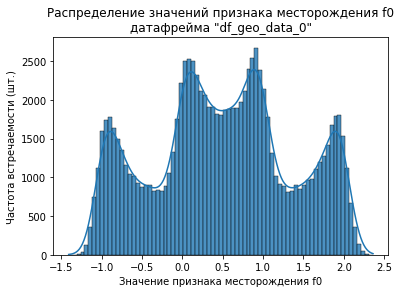

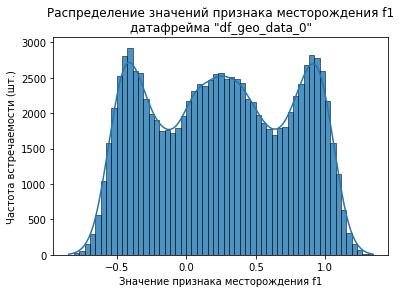

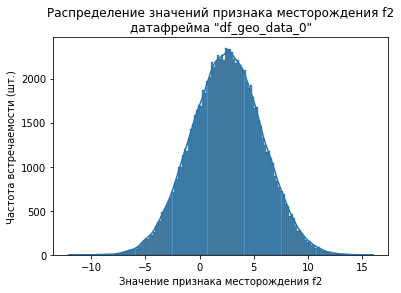

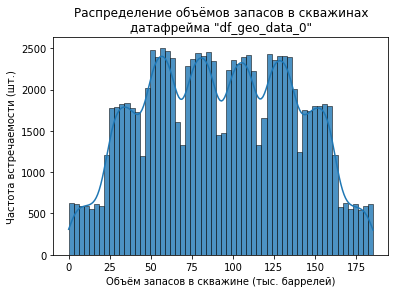

In [32]:
# строим гистограммы для числовых столбцов df_geo_data_0
plot_hist(
    df_geo_data_0,
    kde=True,
    **dict_df_geo_data_0
)

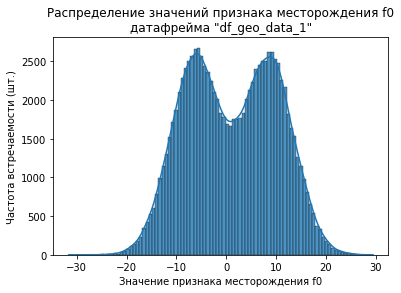

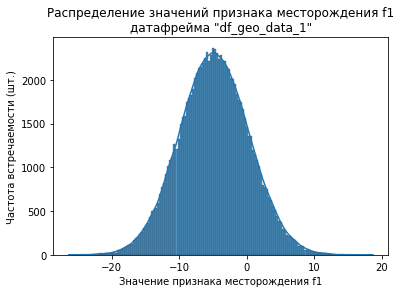

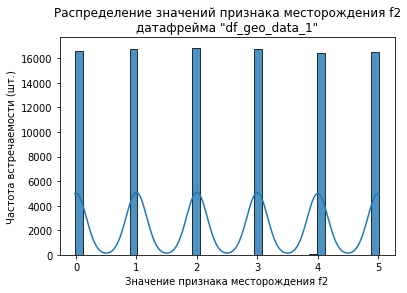

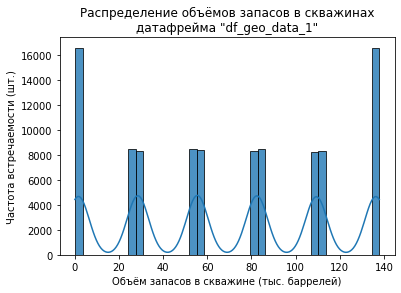

In [33]:
# строим гистограммы для числовых столбцов df_geo_data_1
plot_hist(
    df_geo_data_1,
    kde=True,
    **dict_df_geo_data_1
)

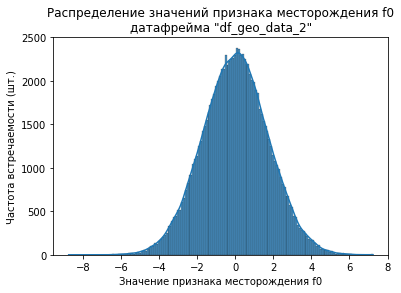

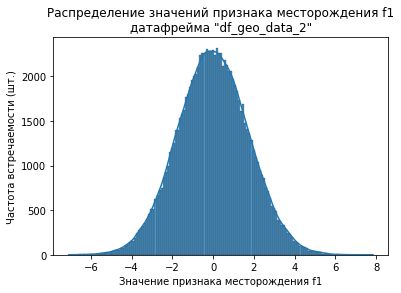

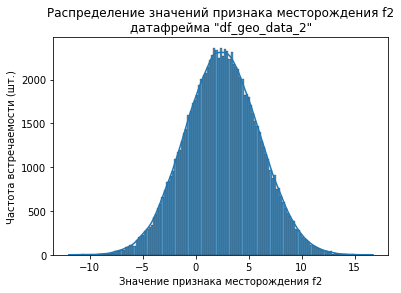

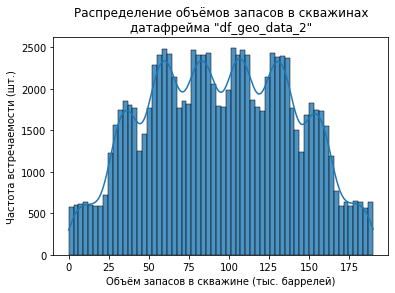

In [34]:
# строим гистограммы для числовых столбцов df_geo_data_2
plot_hist(
    df_geo_data_2,
    kde=True,
    **dict_df_geo_data_2
)

Мы можем видеть мультимодальность значений целевого признака во всех датафреймах, а в датафрейме `df_geo_data_1` наблюдается выраженная дискретность распределения значений входного признака `f2` и целевого признака `product`. При этом данные признаки по своей природе не являются дискретными, что хорошо видно по двум другим выборкам.

### "Ящики с усами" для значений числовых признаков

In [35]:
# объявляем функцию для построения "ящиков с усами"
def plot_box(dataframe,
             figsize=None,
             y=None,
             ylabel=None,
             hue=None,
             hue_order=None,
             legend=False,
             legend_title=None,
             gap=.2,
             bbox_to_anchor=(1.0, 1.0),
             loc='upper left',
             **columns):
    # ключи словаря columns - названия колонок датафрейма
    # значения словаря columns - список [xlabel, title]
    num_cols = dataframe.dtypes.loc[lambda x: (
        (x == 'int64') | (x == 'int32') | (x == 'int16') |
        (x == 'float64') | (x == 'float32') | (x == 'float16')
    )]
    for column, labels in columns.items():
        if column in num_cols:
            fig, ax = plt.subplots(figsize=figsize)
            sns.boxplot(data=dataframe,
                        x=column,
                        y=y,
                        legend=legend,
                        hue=hue,
                        hue_order=hue_order,
                        gap=gap)
            plt.xlabel(labels[0])
            plt.title(labels[1])
            if y:
                plt.ylabel(ylabel)
            if legend:
                plt.legend(title=legend_title,
                           bbox_to_anchor=bbox_to_anchor,
                           loc=loc)
            plt.show()

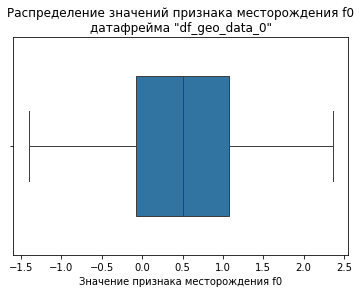

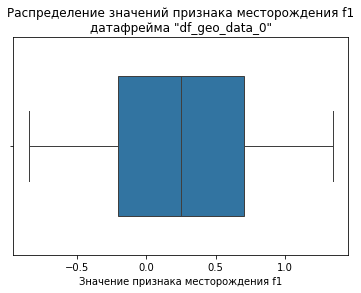

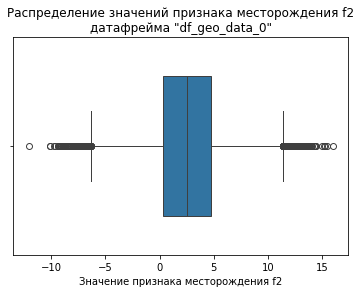

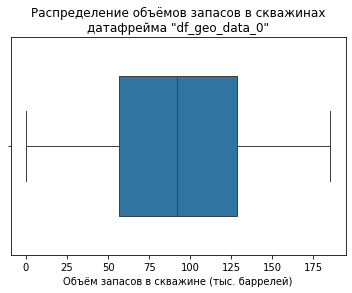

In [36]:
# строим "ящики с усами" для числовых колонок df_geo_data_0
plot_box(
    df_geo_data_0,
    **dict_df_geo_data_0
)

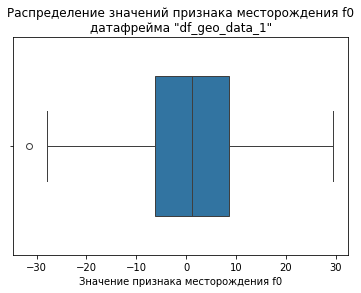

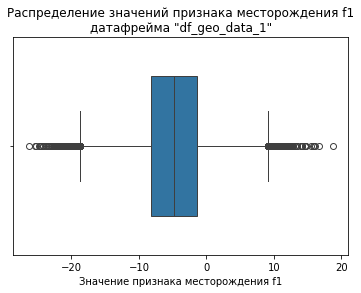

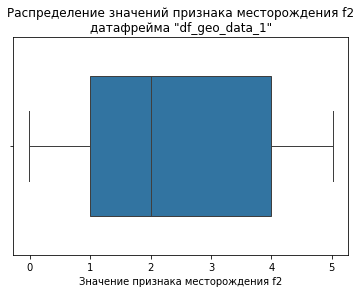

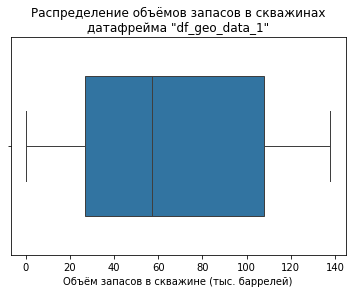

In [38]:
# строим "ящики с усами" для числовых колонок df_geo_data_1
plot_box(
    df_geo_data_1,
    **dict_df_geo_data_1
)

Можно видеть, что медианные значения признака `f2` и целевого признака датафрейма `df_geo_data_1` смещены влево вследствие дискретности распределения значений данных признаков.

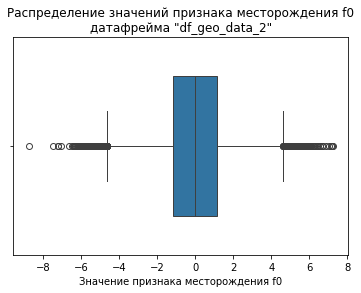

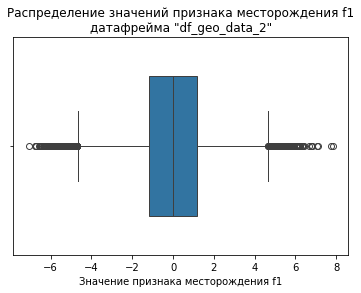

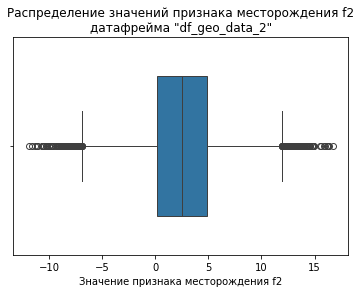

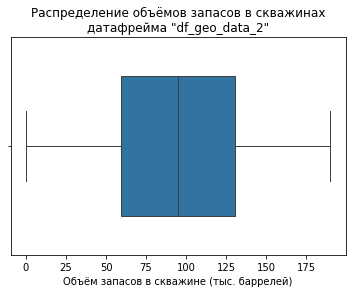

In [40]:
# строим "ящики с усами" для числовых колонок df_geo_data_2
plot_box(
    df_geo_data_2,
    **dict_df_geo_data_2
)

### Вывод по результатам исследовательского анализа данных

На данном этапе мы обнаружили выбросы в ряде признаков, однако мы не стали их удалять из выборок, так как эти выбросы могут быть органически обусловлены спецификой данных.

Мы также убедились в мультимодальности целевого признака во всех выборках и дискретности его распределения в датафрейме `df_geo_data_1`.

В основном почти все признаки во всех выборках показывают симметричное распределение значений относительно медианы, что говорит о сбалансированности выборок.

## Корреляционный анализ данных

### Матрица корреляции признаков

In [42]:
# создаем список колонок с числовыми данными
interval_cols = ['f0', 'f1', 'f2', 'product']

In [43]:
# создаём список с подписями признаков
ticks_labels = [
    'Признак f0',
    'Признак f1',
    'Признак f2',
    'Объём запасов в скважине'
]

In [44]:
# создаём функцию для построения матрицы корреляции phik
def corr_matrix_phik(
    corr_matrix,
    ticks_labels,
    annot=True,
    fmt='.2f',
    cmap='cool',
    linewidths=.3,
    title='Матрица корреляции признаков по критерию $\phi_K$'
):
    fig, ax = plt.subplots()
    sns.heatmap(corr_matrix,
                annot=annot,
                fmt=fmt,
                cmap=cmap,
                linewidths=linewidths,
                xticklabels=ticks_labels,
                yticklabels=ticks_labels)
    plt.title(title)

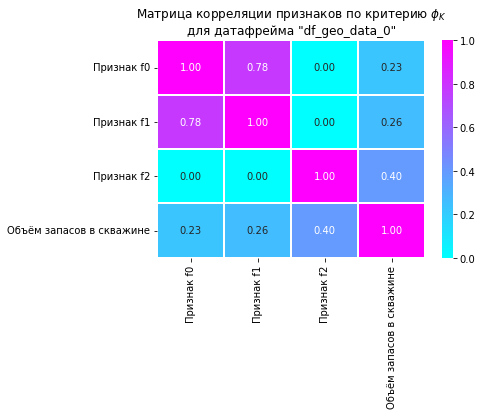

In [45]:
# получаем матрицу корреляции для df_geo_data_0
corr_matrix = (df_geo_data_0
               .drop('id', axis=1)
               .phik_matrix(interval_cols=interval_cols, bins=100))

# визуализируем матрицу корреляции для df_geo_data_0
corr_matrix_phik(
    corr_matrix,
    ticks_labels,
    title='''Матрица корреляции признаков по критерию $\phi_K$
для датафрейма "df_geo_data_0"'''
)

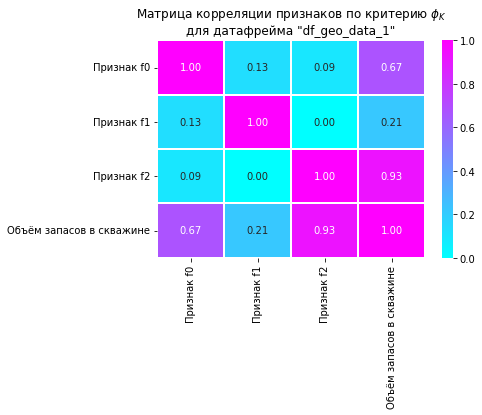

In [46]:
# получаем матрицу корреляции для df_geo_data_1
corr_matrix = (df_geo_data_1
               .drop('id', axis=1)
               .phik_matrix(interval_cols=interval_cols, bins=100))

# визуализируем матрицу корреляции для df_geo_data_1
corr_matrix_phik(
    corr_matrix,
    ticks_labels,
    title='''Матрица корреляции признаков по критерию $\phi_K$
для датафрейма "df_geo_data_1"'''
)

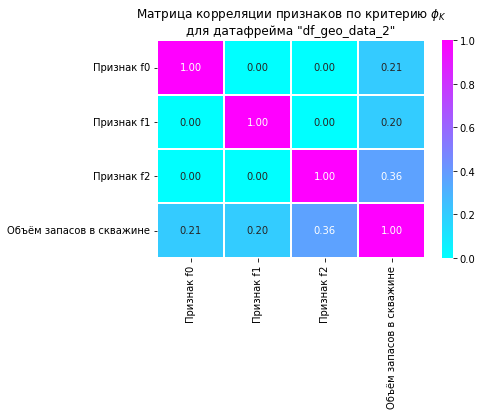

In [47]:
# получаем матрицу корреляции для df_geo_data_2
corr_matrix = (df_geo_data_2
               .drop('id', axis=1)
               .phik_matrix(interval_cols=interval_cols, bins=100))

# визуализируем матрицу корреляции для df_geo_data_2
corr_matrix_phik(
    corr_matrix,
    ticks_labels,
    title='''Матрица корреляции признаков по критерию $\phi_K$
для датафрейма "df_geo_data_2"'''
)

#### Вывод по результатам анализа матриц корреляций признаков

В датафрейме `df_geo_data_0` не прослеживается мультиколлинеарности входных признаков. Признаки `f0`, `f1` демонстрируют слабую корреляция с целевым признаком, а признак `f2` демонстрирует умеренную корреляцию с целевым признаком.

В датафрейме `df_geo_data_1` наблюдается весьма высокая корреляция целевого признака с входным признаком `f2` (коэффициент корреляции 0.93), что может говорить об утечке данных, однако, поскольку признаков в выборке всего три и все они значимы для предсказнаний, признак `f2` не следует удалять из выборки, чтобы не ухудшать качество обучения модели. При этом признак `f0` демонстрирует заметную корреляцию с целевым признаком (коэффициент корреляции 0.67), а признак `f1` демонстрирует слабую корреляцию с целевым признаком (коэффициент корреляции 0.21).

Признаки в датафрейме `df_geo_data_2` демонстрируют похожую картину корреляции, что и признаки в датафрейме `df_geo_data_0`.

### Диаграммы зависимости целевого признака от входных признаков

In [48]:
# объявляем функцию для построения диаграмм рассеяния
def plot_scat(dataframe,
              *legend_titles,
              y=None,
              ylabel=None,
              hue=None,
              legend=False,
              figsize=None,
              hue_order=None,
              bbox_to_anchor=(1.0, 1.0),
              loc='upper left',
              **columns):
    # список legend_title содержит кортежи категориальных признаков и
    # их переводов для каждой пары x, y
    # ключи словаря columns - названия колонок датафрейма
    # значения словаря columns - список [xlabel, title]
    for column, labels in columns.items():
        if hue:
            for hue, legend_title in legend_titles:
                fig, ax = plt.subplots(figsize=figsize)
                sns.scatterplot(data=dataframe,
                                x=column,
                                y=y,
                                hue=hue,
                                hue_order=hue_order)
                plt.xlabel(labels[0])
                plt.ylabel(ylabel)
                plt.title(labels[1])
                if legend:
                    plt.legend(title=legend_title,
                               bbox_to_anchor=bbox_to_anchor,
                               loc=loc)
                plt.show()
        else:
            fig, ax = plt.subplots(figsize=figsize)
            sns.scatterplot(data=dataframe,
                            x=column,
                            y=y)
            plt.xlabel(labels[0])
            plt.ylabel(ylabel)
            plt.title(labels[1])
            plt.show()

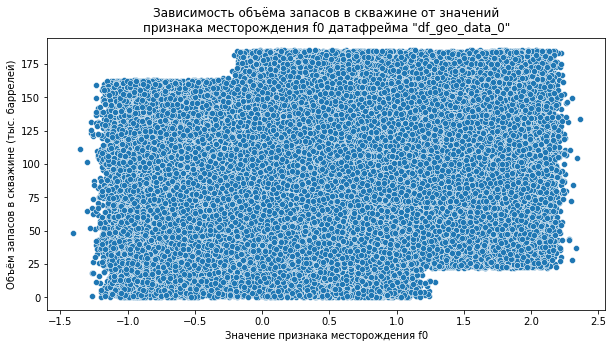

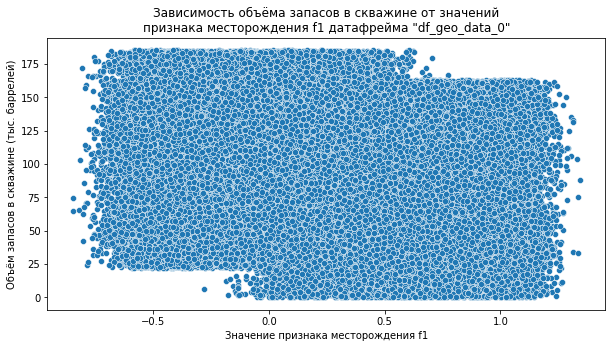

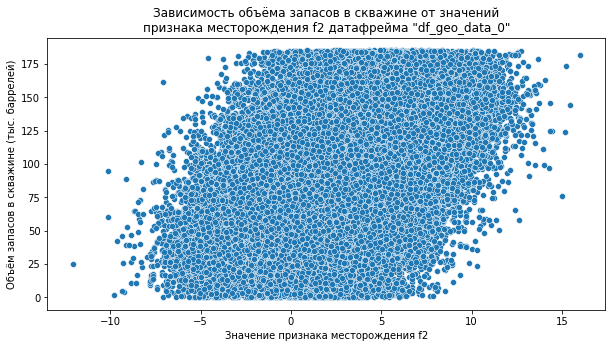

In [49]:
# диаграммы для датафрейма df_geo_data_0
plot_scat(df_geo_data_0,
          y='product',
          ylabel=dict_df_geo_data_0['product'][0],
          figsize=(10, 5),
          f0=['Значение признака месторождения f0',
              '''Зависимость объёма запасов в скважине от значений
признака месторождения f0 датафрейма "df_geo_data_0"'''],
          f1=['Значение признака месторождения f1',
              '''Зависимость объёма запасов в скважине от значений
признака месторождения f1 датафрейма "df_geo_data_0"'''],
          f2=['Значение признака месторождения f2',
              '''Зависимость объёма запасов в скважине от значений
признака месторождения f2 датафрейма "df_geo_data_0"'''])

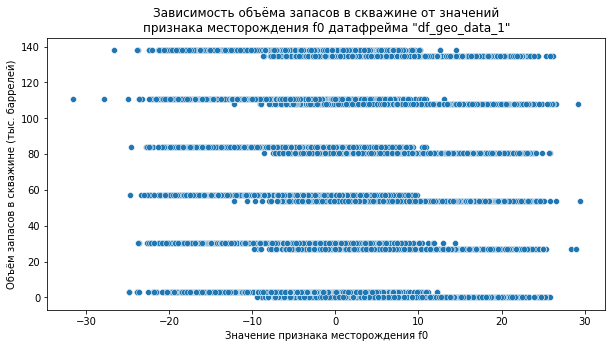

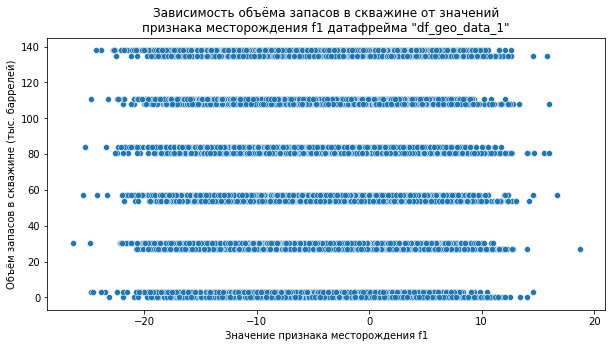

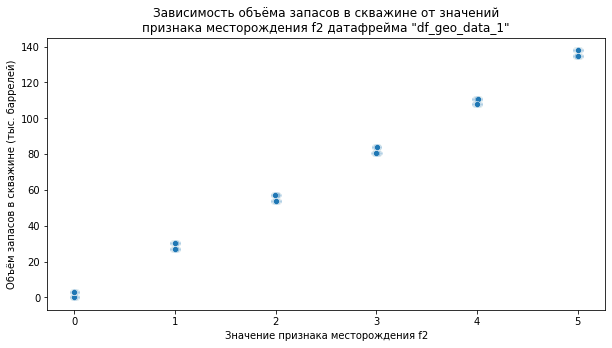

In [50]:
# диаграммы для датафрейма df_geo_data_1
plot_scat(df_geo_data_1,
          y='product',
          ylabel=dict_df_geo_data_1['product'][0],
          figsize=(10, 5),
          f0=['Значение признака месторождения f0',
              '''Зависимость объёма запасов в скважине от значений
признака месторождения f0 датафрейма "df_geo_data_1"'''],
          f1=['Значение признака месторождения f1',
              '''Зависимость объёма запасов в скважине от значений
признака месторождения f1 датафрейма "df_geo_data_1"'''],
          f2=['Значение признака месторождения f2',
              '''Зависимость объёма запасов в скважине от значений
признака месторождения f2 датафрейма "df_geo_data_1"'''])

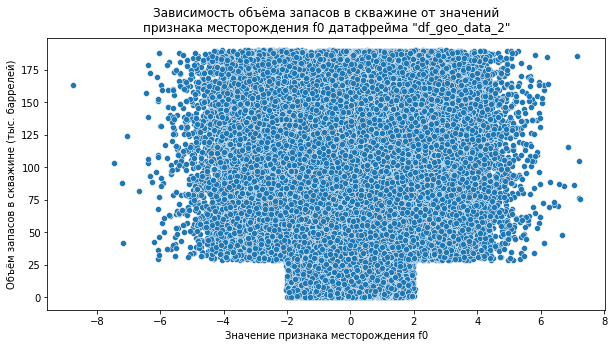

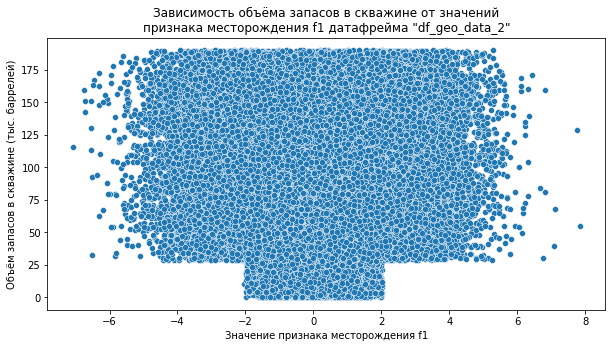

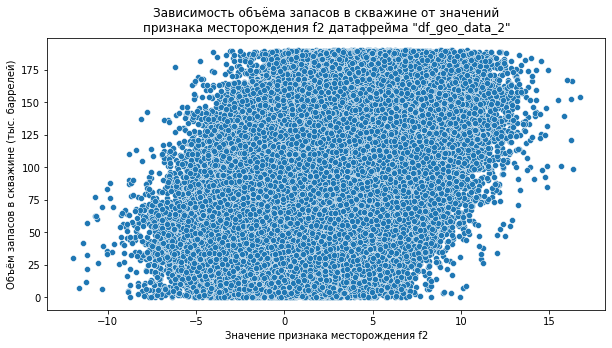

In [51]:
# диаграммы для датафрейма df_geo_data_2
plot_scat(df_geo_data_2,
          y='product',
          ylabel=dict_df_geo_data_2['product'][0],
          figsize=(10, 5),
          f0=['Значение признака месторождения f0',
              '''Зависимость объёма запасов в скважине от значений
признака месторождения f0 датафрейма "df_geo_data_2"'''],
          f1=['Значение признака месторождения f1',
              '''Зависимость объёма запасов в скважине от значений
признака месторождения f1 датафрейма "df_geo_data_2"'''],
          f2=['Значение признака месторождения f2',
              '''Зависимость объёма запасов в скважине от значений
признака месторождения f2 датафрейма "df_geo_data_2"'''])

Мы не видим выраженной линейной зависимости между целевым и входными признаками во всех трёх датафреймах за исключением зависимости целевого признака от входного признака `f2` в датафрейме `df_geo_data_1`, что ранее было подтверждено матрицей корреляции.

Выраженной нелинейности в зависимости целевого признака от входных признаков также не наблюдается, поэтому каких-либо дополнительных преобразований данных для более качественного обучения модели помимо масштабирования не потребуется.

## Обучение и проверка модели для предсказания объёма запасов сырья в скважинах

На данном этапе мы обучим и проверим качество моделей, предсказывающих объём запасов сырья в скважинах. Для обучения мы будем использовать модели линейной регрессии как наиболее стабильные для данного случая.

Мы будем обучать стандартную модель линейной регрессии по методу наименьших квадратов, а также модель линейной регрессии с L2-регуляризацией, которая позволяет добиться меньшего разброса предсказаний модели, так как L2-регуляризация более устойчива к выбросам в том смысле, что сильнее штрафует модель за переобучение, чем модель с L1-регуляризацией.

Для оценки качества модели мы будем использовать метрику RMSE.

In [52]:
# объявляем функцию для вывода размера выборок
def get_df_shape(X_train, X_test):
    print(f'Количество строк в тренировочной выборке: {X_train.shape[0]}')
    print(f'Количество колонок в тренировочной выборке: {X_train.shape[1]}')
    print(f'Размерность тренировочной выборки: {X_train.shape}')
    print(f"\n{'-' * 80}")
    print(f'Количество строк в валидационной выборке: {X_test.shape[0]}')
    print(f'Количество колонок в валидационной выборке: {X_test.shape[1]}')
    print(f'Размерность валидационной выборки: {X_test.shape}')

#### Обучение модели для региона 0

In [53]:
# устанавливаем id в качестве индекса
df_geo_data_0.set_index('id', inplace=True)

In [54]:
# создаём функцию для разбивки выборок
def df_prepare(dataframe,
               test_size, random_state,
               target_feature, feat_to_remove=None):
    # разбиваем выборку на тренировочную и валидационную
    df_train, df_test = train_test_split(
        dataframe,
        test_size=test_size,
        random_state=random_state
    )
    
    # удаляем из выборок ненужные признаки
    if feat_to_remove:
        df_train.drop(feat_to_remove, inplace=True, axis=1)
        df_test.drop(feat_to_remove, inplace=True, axis=1)
    
    # удаляем полные дубликаты из тренировочной выборки
    df_train.drop_duplicates(inplace=True)
    
    # разделяем признаки на входные и целевые
    X_train = df_train.drop(target_feature, axis=1)
    X_test = df_test.drop(target_feature, axis=1)
    y_train = df_train[target_feature]
    y_test = df_test[target_feature]
    
    return X_train, y_train, X_test, y_test

In [59]:
# подготавливаем выборки и проверяем их размерности
X_train_geo_0, y_train_geo_0, X_valid_geo_0, y_valid_geo_0 = (
    df_prepare(df_geo_data_0, TEST_SIZE, RANDOM_STATE, 'product')
)

get_df_shape(X_train_geo_0, X_valid_geo_0)

Количество строк в тренировочной выборке: 74992
Количество колонок в тренировочной выборке: 3
Размерность тренировочной выборки: (74992, 3)

--------------------------------------------------------------------------------
Количество строк в валидационной выборке: 24998
Количество колонок в валидационной выборке: 3
Размерность валидационной выборки: (24998, 3)


In [60]:
# создаём функцию для обучения модели и подбора гиперпараметров
def model_selection_gs(X_train, y_train,
                       pipe_final, param_grid,
                       n_jobs=-1, cv=5, scoring=None):
    # инициализируем модель для поиска лучших гиперпараметов
    gs = GridSearchCV(
        pipe_final,
        param_grid,
        n_jobs=n_jobs,
        cv=cv,
        scoring=scoring
    )
    
    # запускаем поиск гиперпараметров
    gs.fit(X_train, y_train)
    
    # получаем лучшую метрику при кросс-валидации
    print(f'Лучший результат метрики RMSE на тренировочной выборке \
при кросс-валидации:\n', gs.best_score_)
    
    # получаем лучшие гиперпараметры при кросс-валидации
    print(f'Лучшая модель и её параметры при кросс-валидации:\n',
          gs.best_estimator_)
    
    return gs

In [61]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline(
    [
        ('preprocessor', StandardScaler()),
        ('models', LinearRegression())
    ]
)

# задаем гиперпараметры для перебора
param_grid = [
    # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        'preprocessor': [StandardScaler(), MinMaxScaler(), RobustScaler()]
    },
    # словарь для модели Ridge()
    {
        'models': [Ridge(random_state=RANDOM_STATE)],
        'models__alpha': np.linspace(0.1, 10, num=100),
        'preprocessor': [StandardScaler(), MinMaxScaler(), RobustScaler()]
    }
]

In [62]:
# подбираем лучшие гиперпараметры
gs = model_selection_gs(X_train_geo_0, y_train_geo_0,
                        pipe_final, param_grid, n_jobs=-1, cv=5,
                        scoring='neg_root_mean_squared_error')

Лучший результат метрики RMSE на тренировочной выборке при кросс-валидации:
 -37.75351104736328
Лучшая модель и её параметры при кросс-валидации:
 Pipeline(steps=[('preprocessor', StandardScaler()),
                ('models', Ridge(alpha=7.6, random_state=2024))])


Лучшей моделью является модель линейной регрессии с L2-регуляризацией и гиперпараметром `alpha` равным 7.6 для данных, масштабированных с помощью `StandardScaler`.

Сделаем предсказания на валидационной выборке с помощью лучшей модели:

In [63]:
# инициализируем лучшую модель
pipe_final_geo_0_best = Pipeline(
    [
        ('preprocessor', gs.best_estimator_.named_steps['preprocessor']),
        ('models', gs.best_estimator_.named_steps['models'])
    ]
)

# обучаем лучшую модель
pipe_final_geo_0_best.fit(X_train_geo_0, y_train_geo_0)

# получаем предсказания лучшей модели на тестовой выборке
predictions_geo_0_best = pipe_final_geo_0_best.predict(X_valid_geo_0)

# выводим значение метрики лучшей модели на тестовой выборке
print('Метрика RMSE лучшей модели на валидационной выборке:',
      root_mean_squared_error(y_valid_geo_0, predictions_geo_0_best))

Метрика RMSE лучшей модели на валидационной выборке: 37.517372


Мы можем видеть, что качество модели на валидационной выборке не снизилось по сравнению с результатом при кросс-валидации, что говорит о хорошей обобщающей способности модели и стабильности её предсказаний.

Сохраним предсказания и правильные ответы на валидационной выборке и проверим размерность получившегося датафрейма:

In [64]:
y_valid_geo_0_full = pd.concat(
    [
        y_valid_geo_0.reset_index(),
        pd.DataFrame(predictions_geo_0_best,
                     columns=['predicted_product'])
    ],
    axis=1
)
y_valid_geo_0_full.shape

(24998, 3)

In [65]:
# выведем средний запас предсказанного сырья
print('Средний запас предсказанного сырья в скважине в регионе 0:',
      np.mean(y_valid_geo_0_full.predicted_product))

Средний запас предсказанного сырья в скважине в регионе 0: 92.47269


In [66]:
# находим остатки
residuals_geo_0 = (
    y_valid_geo_0_full['product'] - y_valid_geo_0_full.predicted_product
)

In [67]:
# создаём функцию для визуализаии остатков
def residuals_plot(y_test, y_pred):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.histplot(y_pred, ax=ax[0], kde=True)
    ax[0].set_xlabel('Остатки')
    ax[0].set_ylabel('Частота встречаемости (шт.)')
    ax[0].set_title('Диаграмма распределения остатков')
    ax[0].axvline(x=np.mean(y_pred), c='r', label='Среднее')
    ax[0].axvline(x=np.median(y_pred), c='k', ls='--', label='Медиана')
    ax[0].legend()
    print('Среднее значение остатков:', np.mean(y_pred))
    print('Медианное значение остатков:', np.median(y_pred))
    
    sns.scatterplot(x=y_test, y=y_pred)
    ax[1].set_xlabel('Предсказанные значения')
    ax[1].set_ylabel('Остатки')
    ax[1].set_title('Диаграмма дисперсии остатков')

Среднее значение остатков: 0.14644499
Медианное значение остатков: 0.11948395


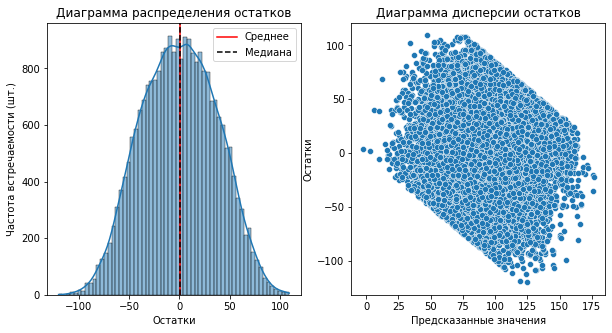

In [68]:
# визуализируем остатки
residuals_plot(y_valid_geo_0_full.predicted_product, residuals_geo_0)

**Вывод по результатам обучения модели для региона 0**

Лучшей моделью для предсказания запасов сырья в скважинах в регионе 0 является модель линейной регресии с L2-регуляризацией и гиперпараметром `alpha` равным 7.6 для данных, масштабированных с помощью `StandardScaler`.

Значение RMSE лучшей модели на валидационной выборке составило 37.5, что на 0.3 лучше значения метрики при кросс-валидации, что, в свою очередь, говорит о хорошей обобщающей способности модели и стабильности её предсказаний на новых данных.

Средний запас предсказанного сырья в скважине в регионе 0 составил 92.5 тыс. баррелей.

Остатки демонстрируют распределение близкое к нормальному без смещения относительно нуля, что говорит о том, что никаких закономерностей в остатках не осталось после обучения модели.

Дисперсия остатков постоянна на всём диапазоне предсказаний (остатки гомоскедатичны).

Мы можем уверенно утверждать, что данную модель можно использовать для предсказаний.

#### Обучение модели для региона 1

In [69]:
# устанавливаем id в качестве индекса
df_geo_data_1.set_index('id', inplace=True)

In [70]:
# подготавливаем выборки и проверяем их размерности
X_train_geo_1, y_train_geo_1, X_valid_geo_1, y_valid_geo_1 = (
    df_prepare(df_geo_data_1, TEST_SIZE, RANDOM_STATE, 'product')
)

get_df_shape(X_train_geo_1, X_valid_geo_1)

Количество строк в тренировочной выборке: 74997
Количество колонок в тренировочной выборке: 3
Размерность тренировочной выборки: (74997, 3)

--------------------------------------------------------------------------------
Количество строк в валидационной выборке: 24999
Количество колонок в валидационной выборке: 3
Размерность валидационной выборки: (24999, 3)


In [76]:
# подбираем лучшие гиперпараметры
gs = model_selection_gs(X_train_geo_1, y_train_geo_1,
                        pipe_final, param_grid, n_jobs=-1, cv=5,
                        scoring='neg_root_mean_squared_error')

Лучший результат метрики RMSE на тренировочной выборке при кросс-валидации:
 -0.8912174820899963
Лучшая модель и её параметры при кросс-валидации:
 Pipeline(steps=[('preprocessor', MinMaxScaler()),
                ('models', LinearRegression())])


Лучшей моделью является модель линейной регрессии без регуляризации для данных, масштабированных с помощью `MinMaxScaler`.

Сделаем предсказания на валидационной выборке с помощью лучшей модели:

In [77]:
# инициализируем лучшую модель
pipe_final_geo_1_best = Pipeline(
    [
        ('preprocessor', gs.best_estimator_.named_steps['preprocessor']),
        ('models', gs.best_estimator_.named_steps['models'])
    ]
)

# обучаем лучшую модель
pipe_final_geo_1_best.fit(X_train_geo_1, y_train_geo_1)

# получаем предсказания лучшей модели на тестовой выборке
predictions_geo_1_best = pipe_final_geo_1_best.predict(X_valid_geo_1)

# выводим значение метрики лучшей модели на тестовой выборке
print('Метрика RMSE лучшей модели на валидационной выборке:',
      root_mean_squared_error(y_valid_geo_1, predictions_geo_1_best))

Метрика RMSE лучшей модели на валидационной выборке: 0.8880373


Мы можем видеть, что качество модели на валидационной выборке не снизилось по сравнению с результатом при кросс-валидации, что говорит о хорошей обобщающей способности модели и стабильности её предсказаний.

Сохраним предсказания и правильные ответы на валидационной выборке и проверим размерность получившегося датафрейма:

In [78]:
y_valid_geo_1_full = pd.concat(
    [
        y_valid_geo_1.reset_index(),
        pd.DataFrame(predictions_geo_1_best,
                     columns=['predicted_product'])
    ],
    axis=1
)
y_valid_geo_1_full.shape

(24999, 3)

In [79]:
# выведем средний запас предсказанного сырья
print('Средний запас предсказанного сырья в скважине в регионе 1:',
      np.mean(y_valid_geo_1_full.predicted_product))

Средний запас предсказанного сырья в скважине в регионе 1: 68.545586


In [80]:
# находим остатки
residuals_geo_1 = (
    y_valid_geo_1_full['product'] - y_valid_geo_1_full.predicted_product
)

Среднее значение остатков: 0.014355215
Медианное значение остатков: 0.021697998


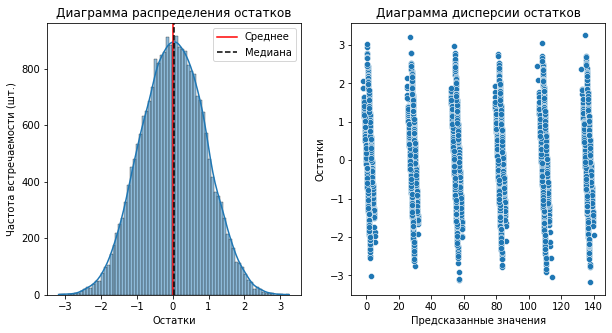

In [81]:
# визуализируем остатки
residuals_plot(y_valid_geo_1_full.predicted_product, residuals_geo_1)

**Вывод по результатам обучения модели для региона 1**

Лучшей моделью для предсказания запасов сырья в скважинах в регионе 1 является модель линейной регрессии без регуляризации для данных, масштабированных с помощью `MinMaxScaler`.

Значение RMSE лучшей модели на валидационной выборке составило 0.89, что говорит о высокой точности предсказаний модели.

Средний запас предсказанного сырья в скважине в регионе 1 составил 68.5 тыс. баррелей.

Остатки демонстрируют распределение близкое к нормальному без смещения относительно нуля, что говорит о том, что никаких закономерностей в остатках не осталось после обучения модели.

Дисперсия остатков постоянна на всём диапазоне предсказаний (остатки гомоскедатичны), несмотря на дискретность распределения остатков.

Мы можем уверенно утверждать, что данную модель можно использовать для предсказаний.

#### Обучение модели для региона 2

In [82]:
# устанавливаем id в качестве индекса
df_geo_data_2.set_index('id', inplace=True)

In [83]:
# подготавливаем выборки и проверяем их размерности
X_train_geo_2, y_train_geo_2, X_valid_geo_2, y_valid_geo_2 = (
    df_prepare(df_geo_data_2, TEST_SIZE, RANDOM_STATE, 'product')
)

get_df_shape(X_train_geo_2, X_valid_geo_2)

Количество строк в тренировочной выборке: 74997
Количество колонок в тренировочной выборке: 3
Размерность тренировочной выборки: (74997, 3)

--------------------------------------------------------------------------------
Количество строк в валидационной выборке: 24999
Количество колонок в валидационной выборке: 3
Размерность валидационной выборки: (24999, 3)


In [89]:
# подбираем лучшие гиперпараметры
gs = model_selection_gs(X_train_geo_2, y_train_geo_2,
                        pipe_final, param_grid, n_jobs=-1, cv=5,
                        scoring='neg_root_mean_squared_error')

Лучший результат метрики RMSE на тренировочной выборке при кросс-валидации:
 -40.04543685913086
Лучшая модель и её параметры при кросс-валидации:
 Pipeline(steps=[('preprocessor', StandardScaler()),
                ('models', LinearRegression())])


Лучшей моделью является модель линейной регрессии без регуляризации для данных, масштабированных с помощью `StandardScaler`.

Сделаем предсказания на валидационной выборке с помощью лучшей модели:

In [90]:
# инициализируем лучшую модель
pipe_final_geo_2_best = Pipeline(
    [
        ('preprocessor', gs.best_estimator_.named_steps['preprocessor']),
        ('models', gs.best_estimator_.named_steps['models'])
    ]
)

# обучаем лучшую модель
pipe_final_geo_2_best.fit(X_train_geo_2, y_train_geo_2)

# получаем предсказания лучшей модели на тестовой выборке
predictions_geo_2_best = pipe_final_geo_2_best.predict(X_valid_geo_2)

# выводим значение метрики лучшей модели на тестовой выборке
print('Метрика RMSE лучшей модели на валидационной выборке:',
      root_mean_squared_error(y_valid_geo_2, predictions_geo_2_best))

Метрика RMSE лучшей модели на валидационной выборке: 40.088627


Мы можем видеть, что качество модели на валидационной выборке практически не снизилось по сравнению с результатом при кросс-валидации, что говорит о хорошей обобщающей способности модели и стабильности её предсказаний.

Сохраним предсказания и правильные ответы на валидационной выборке и проверим размерность получившегося датафрейма:

In [91]:
y_valid_geo_2_full = pd.concat(
    [
        y_valid_geo_2.reset_index(),
        pd.DataFrame(predictions_geo_2_best,
                     columns=['predicted_product'])
    ],
    axis=1
)
y_valid_geo_2_full.shape

(24999, 3)

In [92]:
# выведем средний запас предсказанного сырья
print('Средний запас предсказанного сырья в скважине в регионе 2:',
      np.mean(y_valid_geo_2_full.predicted_product))

Средний запас предсказанного сырья в скважине в регионе 2: 94.941025


In [93]:
# находим остатки
residuals_geo_2 = (
    y_valid_geo_2_full['product'] - y_valid_geo_2_full.predicted_product
)

Среднее значение остатков: 0.023722028
Медианное значение остатков: -0.20913696


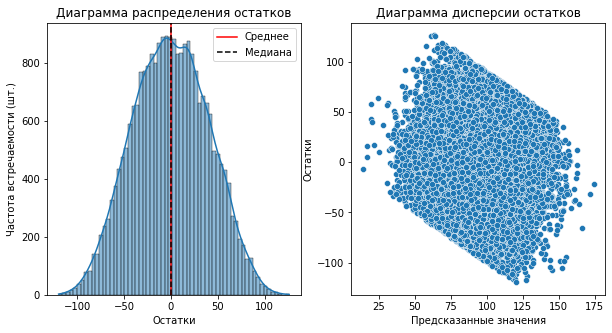

In [94]:
# визуализируем остатки
residuals_plot(y_valid_geo_2_full.predicted_product, residuals_geo_2)

**Вывод по результатам обучения модели для региона 2**

Результат обучения модели для предсказания запасов сырья в скважинах региона 2 очень похож на результат обучения модели для региона 0.

Лучшей моделью для предсказания запасов сырья в скважинах в регионе 2 является модель линейной регресии без регуляризации для данных, масштабированных с помощью `StandardScaler`.

Значение RMSE лучшей модели на валидационной выборке составило 40.1, что почти совпадает со значением метрики при кросс-валидации, что, в свою очередь, говорит о хорошей обобщающей способности модели и стабильности её предсказаний на новых данных.

Средний запас предсказанного сырья в скважине в регионе 2 составил 94.9 тыс. баррелей.

Остатки демонстрируют распределение близкое к нормальному без смещения относительно нуля, что говорит о том, что никаких закономерностей в остатках не осталось после обучения модели.

Дисперсия остатков постоянна на всём диапазоне предсказаний (остатки гомоскедатичны).

Мы можем уверенно утверждать, что данную модель можно использовать для предсказаний.

## Подготовка к расчёту прибыли от добычи сырья в регионах

Создадим константы для параметров, определяемых бизнесом:

- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

- Бюджет на разработку скважин в регионе — 10 млрд рублей.

- Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

In [95]:
N_SAMPLES = 500
N_BEST_SAMPLES = 200
BUDGET = 10_000_000_000
INCOME_PER_UNIT = 450_000

Рассчитаем достаточный объём сырья, который нужно добывать из одной скважины для безубыточной разработки новых скважин в регионе, и сравним его со средним запасом сырья в скважине в каждом регионе:

In [96]:
min_product_per_oiler = BUDGET / INCOME_PER_UNIT / N_BEST_SAMPLES
print('Минимальный объём сырья, добываемый из скважины, для \
безубыточной разработки новой скважины:', min_product_per_oiler)

Минимальный объём сырья, добываемый из скважины, для безубыточной разработки новой скважины: 111.11111111111111


Мы можем видеть, что минимальный объём сырья, добываемый из одной скважины, должен быть в среднем не ниже 111.1 тыс. баррелей, чтобы добыча в данном регионе была безубыточной.

Полученное значение превышает значения среднего запаса сырья в одной скважине во всех трёх регионах, поэтому для поиска подходящих точек для бурения необходимо сократить количество рассматриваемых объектов и оценить уровень рисков при разработке наиболее перспективных из них.

## Расчёт прибыли от добычи сырья в регионах и оценка рисков

Создадим функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

In [98]:
def income(product, predicted_product, n_best_samples, income_per_unit, cost):
    product_sorted = predicted_product.sort_values(ascending=False)
    max_product = product[product_sorted.index][:n_best_samples].sum()
    return income_per_unit * max_product - cost

Посчитаем среднюю прибыль, 95%-й доверительный интервал и риск убытков в каждом регионе с помощью техники Bootstrap. Подходящим для разработки будет считаться регион с риском убытка меньше 2.5% и наибольшей средней прибылью.

In [100]:
# создаём функцию для оценки экономических параметров региона
def region_estimation(product, predicted_product, region,
                      bootstrap_range, n, seed,
                      metric_func, n_best_samples, income_per_unit,
                      cost):
    values = []
    for i in range(bootstrap_range):
        product_subsample = product.sample(
            n=n, replace=True, random_state=seed
        )
        
        predicted_product_subsample = (
            predicted_product[product_subsample.index]
        )
        
        values.append(metric_func(product_subsample,
                                  predicted_product_subsample,
                                  n_best_samples,
                                  income_per_unit,
                                  cost))
    values = pd.Series(values)
    print(f'Средняя прибыль в регионе {region}: {np.mean(values):,.0f} руб.')
    print(f'95%-й доверительный интервал для прибыли в регионе {region}: \
[{values.quantile(0.025):,.1f}; {values.quantile(0.975):,.1f}] руб.')
    print(f'Вероятность убытка в регионе {region}: \
{len(values[values < 0])/len(values):.1%}')
    print(f"\n{'-' * 80}")

In [101]:
# фиксируем последовательность псевдовыборок
state = np.random.RandomState(RANDOM_STATE)

In [102]:
# получаем оценки прибыли, доверительных интервалов и убытков регионов
region_estimation(y_valid_geo_0_full['product'],
                  y_valid_geo_0_full.predicted_product, '0',
                  1000, N_SAMPLES, state,
                  income, N_BEST_SAMPLES, INCOME_PER_UNIT, BUDGET)
region_estimation(y_valid_geo_1_full['product'],
                  y_valid_geo_1_full.predicted_product, '1',
                  1000, N_SAMPLES, state,
                  income, N_BEST_SAMPLES, INCOME_PER_UNIT, BUDGET)
region_estimation(y_valid_geo_2_full['product'],
                  y_valid_geo_2_full.predicted_product, '2',
                  1000, N_SAMPLES, state,
                  income, N_BEST_SAMPLES, INCOME_PER_UNIT, BUDGET)

Средняя прибыль в регионе 0: 467,315,105 руб.
95%-й доверительный интервал для прибыли в регионе 0: [-94,812,871.1; 1,027,188,916.0] руб.
Вероятность убытка в регионе 0: 4.6%

--------------------------------------------------------------------------------
Средняя прибыль в регионе 1: 474,644,298 руб.
95%-й доверительный интервал для прибыли в регионе 1: [68,145,795.9; 910,118,823.2] руб.
Вероятность убытка в регионе 1: 0.4%

--------------------------------------------------------------------------------
Средняя прибыль в регионе 2: 377,211,720 руб.
95%-й доверительный интервал для прибыли в регионе 2: [-171,839,995.1; 945,092,128.9] руб.
Вероятность убытка в регионе 2: 7.7%

--------------------------------------------------------------------------------


Мы можем видеть, что регион 0 и регион 2, похожие друг на друга по всем показателям, не удовлетворяют бизнес-критерию о том, что риск убытка в регионе при разработке новых скважин должен быть ниже 2.5%.

Регион 1, в свою очередь, демонстрирует низкий риск убытка (0.4%) при ожидаемой средней прибыли около 500 млн руб. При этом с вероятностью 95% истинное значение средней прибыли в регионе будет находиться в диапазоне от 68.1 до 910.1 млн руб., то есть нижнее пороговое значение средней прибыли значимо выше нуля для безубыточной разработки скважин в регионе, что является хорошим "буфером" в случае непредвиденных ситуаций при разработке.

Таким образом, можно рекомендовать бизнесу разработку новых скважин в регионе 1, так как это единственный регион из всех представленных, в котором риск убытка не превышает 2.5%, и имеющий хорошую "подушку безопасности" по ожидаемой средней прибыли.

## Общий вывод

Целью исследования являлась разработка модели для предсказания объёма запасов сырья в новых скважинах и с её помощью определение подходящего региона для разработки новых скважин.

При определении подходящего региона учитывались следующие требования бизнеса:

- при разведке региона исследуют 500 точек, из которых выбирают 200 лучших для разработки;
- бюджет на разработку скважин в регионе — 10 млрд рублей;
- доход с каждой единицы продукта составляет 450 тыс. рублей;
- подходящим для разработки считается регион с риском убытка меньше 2.5% и наибольшей средней прибылью.

Для анализа были предоставлены три датасета, содержавшие по 100 тыс. наблюдений в каждом регионе.

Данные в датасетах соответствовали описанию, аномальных значений в данных не было обнаружено, однако в колонке `product` датасета региона 1 содержалось всего 12 уникальных значений из 100 тысяч наблюдений. Во всех трёх датасетах присутствовали единичные дубликаты в колонке `id`, от которых мы избавились на этапе предобработки данных.

На этапе исследовательского анализа было обнаружено, что выборка для региона 1 существенно отличается от остальных выборок по всем статистическим показателям. Среднее значение запасов в скважине в регионе 1 более чем на 30 тыс. баррелей ниже средних значений запасов в регионах 0 и 2.

Целевой признак `product` демонстрирует мультимодальность во всех трёх выборках.

Корреляционный анализ признаков показал мультиколлинеарность входного признака `f2` с целевым признаком в выборке для региона 1 (коэффициент корреляции 0.93), поэтому этот входной признак мы удалили перед обучением модели для данного региона.

Для обучения были использованы линейные модели:

- стандартная модель линейной регрессии по методу наименьших квадратов;
- модель линейной регрессии с L2-регуляризацией.

В результате обучения были получены следующие модели для предсказания объёма запасов сырья в новых скважинах:

- для региона 0: модель линейной регрессии с L2-регуляризацией и гиперпараметром `alpha` равным 7.6 для данных, масштабированных с помощью `StandardScaler`, среднеквадратичное отклонение предсказаний модели от истинных значений на валидационной выборке составило 37.5;
- для региона 1: модель линейной регрессии без регуляризации для данных, масштабированных с помощью `MinMaxScaler`, среднеквадратичное отклонение предсказаний модели от истинных значений на валидационной выборке составило 0.89;
- для региона 2: модель линейной регрессии без регуляризации для данных, масштабированных с помощью `StandardScaler`, среднеквадратичное отклонение предсказаний модели от истинных значений на валидационной выборке составило 40.1.

Минимальный объём сырья, который необходимо добывать для безубыточной разработки новой скважины, составил около 111 тыс. баррелей, что превышает предсказанные средние значения запасов сырья в скважине в каждом регионе.

Поэтому с помощью метода `Bootstrap` для каждого из регионов мы получили 1000 псевдовыборок по 500 точек каждая, имитирующие случайный выбор точек при разведке региона, и из каждой такой выборки мы отобрали только 200 точек с наибольшими предсказанными значениями прибыли, нашли общую ожидаемую прибыль по каждой группе из 200 отобранных точек и вычислили среднюю прибыль по 1000 выборок, которую можно получить в каждом из регионов, разрабатывая наиболее прибыльные месторождения, а также оценили доверительные интервалы для прибыли и риски убытка в каждом из регионов.

UPD 2:

По результатам выполненного исследования было значимо подтверждено, что регион 0 и регион 2, не удовлетворяют бизнес-критерию о том, что риск убытка в регионе при разработке новых скважин должен быть ниже 2.5%. Уровень риска убытка в этих регионах составляет 4.6% и 7.7%, соответственно.

Регион 1 демонстрирует низкий риск убытка в размере 0.4% при ожидаемой средней прибыли около 500 млн руб., и с вероятностью 95% истинное значение средней прибыли в регионе будет находиться в диапазоне от 68.1 до 910.1 млн руб.

Таким образом, по результатам исследования можно рекомендовать бизнесу разработку новых скважин в регионе 1, поскольку это регион с приемлемым уровнем риска и хорошей "подушкой безопасности" по ожидаемой средней прибыли в случае расхождений между ожидаемыми и фактическими объёмами запасов в скважинах после начала разработки.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован